# DTN exploritory analysis
find where DTN appears in procs and recreate plots from other analysis for comparision

In [1]:
#import packages
import epmt_query as eq
import sys
sys.path.insert(0,'/home/Ian.Laflotte/ians_py374/pip_experiment')
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
############################
###  histogram function  ###
############################
def histo(jobs = [],factor = [], title = None, bins = None, scale = 'log', color = None):
    
    """
    Returns a bar graph of a specific metric from a set of jobs. Expects jobs with fmt='dict'.

    Parameters
    ----------
    
    jobs    : list, mandatory
              List of jobs in 'dict' format.
                 
    
    factor   : string, mandatory
             Mandatory. Variable plotted in histogram. must be one of the following:
             'exitcode','duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt',
             'cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'processor', 'starttime', 'vol_ctxsw', 'guest_time', 'read_bytes', 'systemtime', 
             'time_oncpu', 'timeslices', 'invol_ctxsw', 'num_threads', 'write_bytes':, 'time_waiting', 'delayacct_blkio_time', 'cancelled_write_bytes'
             
    title    : string, optional
               Title at top of plot 
               
    bins  : int, optional
               Sets number of bins in histogram.
               Default is 50 bins
    
    scale    : string, optional
               Scaling factor for both x-axis and binning system. 
               By default, set to log scale. Only accepts 'log' or 'linear'.
               
    color    : string, optional
               Any color that matplotlib accepts.
               No input results in automatic color
    """
    #Plotting done with matplotlib
    import sys
    sys.path.insert(0,'/home/Ian.Laflotte/ians_py374/pip_experiment')
    import matplotlib.pyplot as plt
    import numpy as np
    
    #pull data from jobs
    data_list = []
    for job_instance in range(len(jobs)):
        if factor in jobs[job_instance]:
            if jobs[job_instance].get(factor) != None:   #prevents breakage if set is empty or doesn't exist
                data_list.append(jobs[job_instance][factor])
    #incase of a zero set
    if sum(data_list) == 0:
        return print('No non-zero data found in ',factor)
        
    #print(len(data_list))
    #make plot
    plt.figure()
    plt.style.use('default')
    
    #optional features
    #title of plot
    if title:
        plt.title(title)
    #set number of bins
    if bins:
        bins = bins
    else:
        bins = 50
    #bin check for zero, as it messes up np.log10()
    if min(data_list) == 0:
        bottom_bin = 0
    else:
        bottom_bin = np.log10(min(data_list))
    #set scaling factor
    if scale == 'log':
        plt.hist(data_list, bins = np.logspace(bottom_bin,np.log10(max(data_list)),bins), color = color)
        plt.xscale('log')
    if scale == 'linear':
        plt.hist(data_list, bins = np.linspace(min(data_list),max(data_list),bins), color = color)
        plt.xscale('linear')  

    #finish up
    plt.ylabel('Counts')
    plt.xlabel(factor)

In [3]:
###############################
###  2D histogram function  ###
###############################
def hist2d(jobs = [],x = [],y =[], title = None, bins = None, scale = 'log'):
    
    """
    Returns a bar graph of a specific metric from a set of jobs. Expects jobs with fmt='dict'.

    Parameters
    ----------
    
    jobs    : list, mandatory
              List of jobs in 'dict' format.
                 
    
    x,y     : string, mandatory
                  Variable plotted in histogram. must be one of the following:
             'duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt',
             'cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'processor', 'starttime', 'vol_ctxsw', 'guest_time', 'read_bytes', 'systemtime', 
             'time_oncpu', 'timeslices', 'invol_ctxsw', 'num_threads', 'write_bytes':, 'time_waiting', 'delayacct_blkio_time', 'cancelled_write_bytes'
             
    title    : string, optional
               Title at top of plot 
               
    bin_num  : int, optional
               Sets number of bins in histogram.
               Default is 50 bins
    
    scale    : string, optional
               Scaling factor for both x-axis and binning system. 
               By default, set to log scale. Only accepts 'log' or 'linear'.
               
    """
    #Plotting done with matplotlib
    import sys
    sys.path.insert(0,'/home/Ian.Laflotte/ians_py374/pip_experiment')
    import matplotlib.pyplot as plt
    import numpy as np
    
    #pull data from jobs
    data_listx = []
    data_listy = []
    for job_instance in range(len(jobs)):
        if x in jobs[job_instance]:
            if jobs[job_instance].get(x) != None and jobs[job_instance].get(y) != None:   #prevents breakage if set is empty or doesn't exist
                data_listx.append(jobs[job_instance][x])
                data_listy.append(jobs[job_instance][y])
    #print(len(data_list))
    #make plot
    plt.figure()
    plt.style.use('default')
    
    #optional features
    #title of plot
    if title:
        plt.title(title)
    #set number of bins
    if bins:
        bins = bins
    else:
        bins = 20
    #check for zero in lowest bin
    if min(min(data_listx),min(data_listy)) == 0:
        bottom_bin = 0
    else:
        bottom_bin = np.log10(min(min(data_listx),min(data_listy)))
    #set scaling factor
    if scale == 'log':
        plt.hist2d(data_listx,data_listy, bins = np.logspace(bottom_bin,np.log10(max(max(data_listx),max(data_listy))),bins))
        plt.xscale('log')
        plt.yscale('log')
    if scale == 'linear':
        plt.hist2d(data_listx,data_listy, bins = np.linspace(min(min(data_listx),min(data_listy)),max(max(data_listx),max(data_listy)),bins))
        plt.xscale('linear')  
        plt.yscale('linear')  
    #finish up
    plt.colorbar(label = 'Counts')
    
    plt.ylabel(y)
    plt.xlabel(x)
    

In [5]:
#use orm format to get jobs and then feed to get_procs for a quicker run time
start = time.time()
job_num = 1000
jobs_all = eq.get_jobs(limit = job_num,
                       before = -7,
                       fmt='orm') #format for passing to get_procs
procs_all = eq.get_procs(jobs = jobs_all,
                       fmt='dict')
print(f'number of elements in procs_all={len(procs_all)}')
print("time:",(time.time()-start)/60)

number of elements in procs_all=3211176
time: 11.064500617980958


In [11]:
#sort dtn procs. might be slow due to large number of files
dtn_procs = []
for aa in range(len(procs_all)):
    if procs_all[aa]['args'].find('dtn')>=0:
        dtn_procs.append(procs_all[aa])
print('number of cases found: ',len(dtn_procs))

number of cases found:  75345


In [13]:
for proc in dtn_procs:
    print(proc['host'])

pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp332
pp332
pp332
pp332
pp332
pp332
pp332
pp332
pp332
pp338
pp338
pp338
pp338
pp338
pp338
pp338
pp338
pp338
pp332
pp332
pp332
pp332
pp332
pp332
pp332
pp332
pp332
pp338
pp338
pp338
pp338
pp338
pp338
pp338
pp338
pp338
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp205
pp205
pp205
pp201
pp201
pp201
pp205
pp205
pp201
pp201
pp205
pp201
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp313
pp313
pp313
pp313
pp313
pp313
pp313
pp313
pp313
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp313
pp313
pp313
pp313
pp313
pp313
pp313
pp313
pp313
pp309
pp309
pp309
pp309
pp309
pp309
pp201
pp201
pp201
pp309
pp30

pp210
pp324
pp324
pp314
pp324
pp306
pp306
pp329
pp319
pp318
pp201
pp330
pp311
pp310
pp329
pp319
pp201
pp326
pp318
pp317
pp320
pp102
pp330
pp311
pp310
pp331
pp306
pp326
pp320
pp317
pp102
pp202
pp331
pp202
pp329
pp319
pp318
pp330
pp311
pp201
pp310
pp326
pp320
pp317
pp102
pp331
pp202
pp328
pp328
pp210
pp210
pp328
pp210
pp210
pp210
pp210
pp318
pp330
pp319
pp329
pp326
pp331
pp306
pp311
pp308
pp318
pp330
pp319
pp310
pp317
pp331
pp329
pp326
pp320
pp311
pp306
pp308
pp310
pp317
pp320
pp330
pp329
pp331
pp318
pp319
pp326
pp311
pp306
pp308
pp310
pp317
pp320
pp331
pp330
pp329
pp328
pp102
pp314
pp331
pp318
pp330
pp319
pp329
pp102
pp314
pp328
pp326
pp318
pp319
pp310
pp324
pp317
pp326
pp317
pp310
pp324
pp331
pp330
pp329
pp318
pp314
pp319
pp317
pp102
pp310
pp328
pp326
pp324
pp210
pp314
pp210
pp314
pp306
pp311
pp306
pp311
pp314
pp306
pp311
pp210
pp331
pp324
pp329
pp320
pp331
pp324
pp329
pp320
pp330
pp310
pp319
pp326
pp102
pp328
pp331
pp318
pp330
pp319
pp324
pp326
pp310
pp210
pp102
pp329
pp320
pp328
pp31

pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp326
pp308
pp308
pp308
pp308
pp308
pp308
pp308
pp308
pp308
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp318
pp318
pp318
pp318
pp318
pp318
pp318
pp318
pp318
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp328
pp328
pp323
pp328
pp32

pp332
pp009
pp028
pp009
pp338
pp028
pp338
pp338
pp009
pp332
pp332
pp028
pp332
pp338
pp338
pp338
pp009
pp010
pp009
pp010
pp009
pp010
pp332
pp332
pp332
pp338
pp338
pp010
pp028
pp010
pp338
pp009
pp028
pp009
pp010
pp009
pp332
pp338
pp028
pp332
pp338
pp338
pp332
pp010
pp010
pp010
pp332
pp332
pp338
pp338
pp332
pp338
pp028
pp028
pp338
pp338
pp028
pp338
pp332
pp332
pp332
pp027
pp027
pp338
pp338
pp338
pp027
pp332
pp332
pp332
pp338
pp338
pp303
pp338
pp303
pp332
pp303
pp332
pp332
pp338
pp027
pp338
pp027
pp338
pp008
pp008
pp303
pp027
pp303
pp008
pp303
pp332
pp338
pp332
pp338
pp338
pp332
pp008
pp303
pp027
pp008
pp303
pp027
pp338
pp338
pp008
pp303
pp338
pp332
pp332
pp332
pp027
pp008
pp008
pp338
pp338
pp008
pp338
pp332
pp332
pp332
pp338
pp338
pp338
pp332
pp332
pp332
pp338
pp338
pp338
pp332
pp332
pp338
pp338
pp332
pp338
pp338
pp338
pp338
pp332
pp332
pp332
pp338
pp332
pp338
pp332
pp338
pp332
pp010
pp010
pp010
pp338
pp338
pp338
pp009
pp009
pp009
pp010
pp332
pp010
pp332
pp338
pp010
pp332
pp338
pp338
pp00

pp029
pp029
pp039
pp039
pp027
pp027
pp036
pp036
pp039
pp036
pp027
pp031
pp031
pp032
pp032
pp036
pp031
pp036
pp036
pp032
pp039
pp039
pp200
pp200
pp036
pp036
pp027
pp039
pp027
pp200
pp036
pp031
pp031
pp027
pp032
pp032
pp031
pp032
pp030
pp030
pp200
pp200
pp039
pp030
pp027
pp039
pp031
pp027
pp200
pp031
pp028
pp032
pp028
pp032
pp039
pp027
pp031
pp038
pp038
pp028
pp032
pp200
pp200
pp030
pp038
pp030
pp027
pp200
pp039
pp027
pp030
pp039
pp027
pp028
pp039
pp028
pp038
pp038
pp030
pp028
pp030
pp038
pp030
pp027
pp027
pp037
pp037
pp039
pp038
pp039
pp038
pp027
pp037
pp039
pp038
pp027
pp027
pp028
pp037
pp028
pp037
pp039
pp039
pp027
pp037
pp028
pp039
pp033
pp033
pp037
pp033
pp037
pp028
pp028
pp037
pp027
pp039
pp027
pp039
pp028
pp033
pp033
pp027
pp039
pp036
pp036
pp033
pp036
pp036
pp036
pp039
pp027
pp028
pp039
pp027
pp036
pp033
pp028
pp033
pp029
pp029
pp039
pp027
pp028
pp033
pp036
pp036
pp029
pp036
pp028
pp028
pp027
pp029
pp027
pp029
pp028
pp027
pp029
pp029
pp029
pp027
pp027
pp028
pp029
pp028
pp027
pp02

pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp027
pp028
pp027
pp027
pp028
pp028
pp027
pp027
pp028
pp027
pp028
pp028
pp027
pp027
pp028
pp027
pp028
pp028
pp027
pp027
pp028
pp027
pp028
pp027
pp028
pp027
pp028
pp027
pp027
pp028
pp027
pp028
pp027
pp028
pp027
pp027
pp028
pp028
pp027
pp028
pp027
pp027
pp028
pp028
pp027
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp027
pp027
pp028
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp027
pp028
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp027
pp027
pp028
pp027
pp028
pp028
pp027
pp028
pp027
pp027
pp028
pp02

pp204
pp204
pp062
pp204
pp062
pp062
pp062
pp062
pp062
pp062
pp303
pp303
pp303
pp303
pp303
pp303
pp303
pp303
pp303
pp204
pp204
pp204
pp204
pp204
pp204
pp062
pp062
pp204
pp062
pp204
pp204
pp062
pp062
pp062
pp062
pp062
pp062
pp303
pp303
pp303
pp303
pp303
pp303
pp303
pp303
pp303
pp204
pp204
pp204
pp204
pp204
pp204
pp062
pp062
pp062
pp204
pp204
pp204
pp062
pp062
pp062
pp303
pp303
pp303
pp062
pp062
pp062
pp303
pp303
pp303
pp303
pp303
pp303
pp204
pp204
pp204
pp204
pp204
pp204
pp062
pp062
pp062
pp303
pp204
pp303
pp204
pp303
pp204
pp062
pp062
pp303
pp303
pp062
pp303
pp303
pp303
pp303
pp062
pp062
pp062
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp062
pp062
pp062
pp062
pp062
pp062
pp062
pp062
pp062
pp303
pp303
pp303
pp303
pp303
pp305
pp305
pp303
pp305
pp303
pp303
pp305
pp305
pp303
pp305
pp305
pp305
pp305
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp201
pp062
pp062
pp062
pp062
pp062
pp062
pp062
pp062
pp062
pp303
pp303
pp303
pp303
pp303
pp303
pp305
pp305
pp305
pp303
pp303
pp303
pp30

pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp027
pp027
pp027
pp028
pp027
pp028
pp027
pp028
pp027
pp028
pp028
pp027
pp028
pp027
pp028
pp027
pp028
pp028
pp027
pp027
pp027
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp028
pp028
pp027
pp027
pp028
pp027
pp027
pp028
pp027
pp028
pp027
pp028
pp027
pp027
pp028
pp028
pp027
pp028
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp027
pp027
pp028
pp027
pp027
pp027
pp028
pp028
pp027
pp028
pp028
pp028
pp028
pp027
pp027
pp028
pp028
pp027
pp028
pp027
pp027
pp028
pp028
pp027
pp028
pp027
pp027
pp028
pp028
pp027
pp028
pp027
pp027
pp027
pp027
pp027
pp027
pp028
pp028
pp027
pp027
pp028
pp027
pp028
pp028
pp027
pp027
pp027
pp028
pp027
pp027
pp027
pp028
pp028
pp027
pp027
pp028
pp027
pp027
pp027
pp027
pp027
pp027
pp027
pp028
pp028
pp028
pp027
pp027
pp027
pp028
pp028
pp027
pp027
pp028
pp027
pp028
pp028
pp027
pp027
pp027
pp028
pp027
pp027
pp027
pp027
pp027
pp027
pp027
pp02

pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp331
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp204
pp204
pp204
pp038
pp038
pp038
pp204
pp204
pp204
pp204
pp204
pp204
pp038
pp038
pp038
pp204
pp204
pp204
pp038
pp038
pp204
pp204
pp038
pp204
pp204
pp204
pp204
pp038
pp038
pp038
pp204
pp20

pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp207
pp207
pp207
pp207
pp207
pp207
pp207
pp207
pp207
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp210
pp210
pp210
pp210
pp210
pp210
pp210
pp210
pp210
pp301
pp301
pp301
pp301
pp301
pp301
pp210
pp210
pp210
pp210
pp210
pp210
pp210
pp210
pp210
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp053
pp326
pp326
pp326
pp326
pp326
pp32

pp048
pp048
pp048
pp307
pp307
pp307
pp308
pp308
pp308
pp307
pp307
pp307
pp308
pp308
pp308
pp308
pp308
pp308
pp308
pp308
pp308
pp310
pp310
pp310
pp310
pp310
pp310
pp332
pp332
pp332
pp332
pp332
pp332
pp310
pp310
pp310
pp310
pp310
pp310
pp335
pp335
pp335
pp335
pp335
pp335
pp335
pp335
pp335
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp030
pp030
pp030
pp028
pp028
pp030
pp028
pp030
pp030
pp028
pp028
pp030
pp030
pp028
pp030
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp028
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp311
pp31

pp055
pp065
pp065
pp065
pp065
pp065
pp065
pp065
pp065
pp065
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp068
pp068
pp068
pp074
pp074
pp074
pp068
pp068
pp068
pp074
pp074
pp074
pp068
pp068
pp068
pp074
pp074
pp074
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp068
pp068
pp068
pp068
pp068
pp068
pp068
pp068
pp068
pp063
pp059
pp063
pp059
pp063
pp059
pp063
pp063
pp063
pp059
pp059
pp059
pp063
pp063
pp063
pp059
pp059
pp059
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp074
pp074
pp074
pp074
pp074
pp074
pp073
pp073
pp073
pp074
pp074
pp074
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp073
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp322
pp204
pp322
pp204
pp322
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp204
pp322
pp204
pp322
pp204
pp322
pp204
pp32

pp201
pp208
pp201
pp328
pp208
pp201
pp039
pp207
pp039
pp207
pp104
pp104
pp207
pp104
pp208
pp208
pp039
pp201
pp201
pp208
pp209
pp209
pp201
pp210
pp209
pp210
pp104
pp104
pp104
pp208
pp039
pp208
pp039
pp210
pp201
pp201
pp208
pp209
pp209
pp201
pp039
pp209
pp104
pp057
pp104
pp210
pp057
pp210
pp209
pp209
pp104
pp209
pp210
pp057
pp057
pp057
pp210
pp320
pp210
pp320
pp057
pp320
pp210
pp320
pp320
pp320
pp057
pp009
pp057
pp009
pp009
pp210
pp057
pp210
pp331
pp331
pp331
pp210
pp009
pp009
pp009
pp320
pp320
pp320
pp331
pp331
pp331
pp202
pp202
pp009
pp009
pp202
pp009
pp331
pp331
pp331
pp210
pp202
pp202
pp210
pp328
pp202
pp328
pp328
pp210
pp200
pp200
pp200
pp202
pp202
pp328
pp328
pp202
pp328
pp200
pp200
pp207
pp207
pp210
pp210
pp200
pp328
pp328
pp207
pp328
pp210
pp200
pp207
pp200
pp207
pp200
pp207
pp208
pp208
pp208
pp207
pp207
pp207
pp208
pp208
pp208
pp208
pp208
pp209
pp209
pp208
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp320
pp320
pp320
pp331
pp320
pp320
pp331
pp320
pp331
pp320
pp320
pp331
pp009
pp33

pp039
pp325
pp325
pp325
pp325
pp325
pp317
pp317
pp325
pp317
pp325
pp325
pp325
pp317
pp317
pp317
pp317
pp317
pp317
pp040
pp040
pp312
pp312
pp312
pp040
pp312
pp312
pp312
pp040
pp040
pp312
pp312
pp312
pp040
pp040
pp040
pp040
pp325
pp325
pp325
pp325
pp325
pp325
pp039
pp039
pp325
pp039
pp325
pp325
pp325
pp325
pp325
pp312
pp312
pp039
pp039
pp312
pp039
pp325
pp312
pp325
pp312
pp312
pp325
pp317
pp317
pp317
pp312
pp312
pp325
pp325
pp312
pp325
pp039
pp317
pp317
pp039
pp317
pp039
pp325
pp325
pp317
pp325
pp317
pp317
pp325
pp325
pp325
pp325
pp325
pp325
pp325
pp325
pp325
pp040
pp040
pp325
pp325
pp325
pp040
pp325
pp325
pp325
pp040
pp040
pp325
pp325
pp325
pp040
pp325
pp325
pp325
pp040
pp040
pp040
pp325
pp325
pp325
pp325
pp325
pp325
pp325
pp312
pp325
pp312
pp325
pp312
pp325
pp325
pp312
pp312
pp325
pp312
pp317
pp317
pp312
pp312
pp325
pp317
pp312
pp325
pp325
pp317
pp317
pp325
pp325
pp317
pp325
pp317
pp317
pp325
pp325
pp317
pp325
pp325
pp325
pp325
pp325
pp325
pp325
pp039
pp039
pp039
pp325
pp325
pp325
pp32

pp320
pp317
pp320
pp057
pp317
pp320
pp051
pp051
pp312
pp312
pp312
pp317
pp320
pp317
pp320
pp051
pp317
pp320
pp057
pp057
pp312
pp312
pp312
pp317
pp057
pp317
pp320
pp320
pp317
pp320
pp312
pp312
pp312
pp312
pp054
pp312
pp054
pp312
pp325
pp325
pp054
pp325
pp054
pp325
pp054
pp325
pp325
pp312
pp105
pp054
pp312
pp105
pp312
pp105
pp325
pp325
pp054
pp054
pp325
pp312
pp312
pp054
pp312
pp105
pp105
pp105
pp312
pp312
pp312
pp105
pp105
pp105
pp329
pp312
pp329
pp312
pp312
pp329
pp104
pp104
pp104
pp329
pp329
pp312
pp051
pp312
pp329
pp051
pp312
pp104
pp104
pp042
pp051
pp042
pp104
pp312
pp312
pp329
pp329
pp312
pp329
pp042
pp104
pp104
pp104
pp312
pp051
pp312
pp051
pp312
pp042
pp051
pp042
pp312
pp312
pp312
pp320
pp042
pp320
pp320
pp317
pp317
pp317
pp051
pp051
pp312
pp312
pp320
pp320
pp312
pp320
pp317
pp317
pp051
pp317
pp312
pp312
pp312
pp320
pp320
pp320
pp317
pp317
pp042
pp317
pp042
pp042
pp325
pp325
pp325
pp042
pp042
pp325
pp325
pp042
pp325
pp051
pp051
pp054
pp051
pp054
pp325
pp325
pp054
pp325
pp042
pp05

pp104
pp051
pp102
pp051
pp102
pp051
pp051
pp102
pp051
pp051
pp102
pp102
pp102
pp051
pp051
pp051
pp051
pp051
pp051
pp102
pp102
pp102
pp102
pp102
pp102
pp102
pp102
pp102
pp102
pp102
pp102
pp057
pp057
pp057
pp057
pp057
pp057
pp057
pp057
pp057
pp060
pp060
pp060
pp060
pp060
pp060
pp060
pp057
pp057
pp060
pp057
pp060
pp057
pp060
pp057
pp060
pp057
pp060
pp057
pp057
pp060
pp060
pp057
pp060
pp057
pp057
pp060
pp060
pp057
pp060
pp057
pp057
pp057
pp060
pp060
pp060
pp057
pp057
pp057
pp060
pp060
pp060
pp057
pp057
pp057
pp060
pp060
pp057
pp060
pp057
pp057
pp060
pp060
pp057
pp057
pp060
pp057
pp060
pp060
pp057
pp057
pp060
pp057
pp060
pp060
pp057
pp057
pp060
pp057
pp060
pp060
pp057
pp057
pp060
pp057
pp060
pp060
pp057
pp060
pp057
pp057
pp057
pp057
pp060
pp060
pp057
pp060
pp060
pp057
pp060
pp057
pp060
pp057
pp057
pp057
pp060
pp060
pp057
pp060
pp060
pp060
pp057
pp057
pp060
pp057
pp057
pp057
pp060
pp060
pp057
pp060
pp060
pp060
pp057
pp057
pp060
pp057
pp057
pp057
pp057
pp057
pp057
pp057
pp057
pp057
pp057
pp05

pp329
pp203
pp329
pp203
pp329
pp203
pp068
pp068
pp203
pp068
pp203
pp203
pp068
pp068
pp068
pp068
pp068
pp068
pp068
pp068
pp068
pp068
pp068
pp068
pp320
pp320
pp309
pp309
pp320
pp309
pp320
pp320
pp309
pp309
pp320
pp309
pp068
pp068
pp068
pp320
pp320
pp309
pp309
pp320
pp309
pp068
pp068
pp068
pp320
pp320
pp320
pp320
pp320
pp320
pp309
pp309
pp309
pp320
pp320
pp320
pp309
pp309
pp309
pp309
pp309
pp309
pp320
pp320
pp320
pp309
pp309
pp309
pp320
pp320
pp320
pp309
pp309
pp309
pp320
pp320
pp320
pp309
pp309
pp309
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp207
pp207
pp207
pp207
pp207
pp207
pp207
pp207
pp207
pp309
pp309
pp320
pp320
pp309
pp320
pp309
pp320
pp309
pp320
pp309
pp320
pp320
pp309
pp320
pp309
pp205
pp320
pp309
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp205
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp307
pp307
pp307
pp307
pp307
pp307
pp320
pp320
pp205
pp205
pp309
pp320
pp309
pp205
pp309
pp307
pp307
pp320
pp320
pp307
pp320
pp205
pp309
pp328
pp205
pp309
pp328
pp309
pp32

pp316
pp316
pp316
pp060
pp060
pp060
pp060
pp060
pp060
pp060
pp061
pp061
pp060
pp061
pp060
pp060
pp061
pp061
pp061
pp061
pp061
pp061
pp060
pp060
pp060
pp060
pp060
pp060
pp060
pp060
pp060
pp060
pp060
pp060
pp061
pp061
pp061
pp333
pp333
pp333
pp061
pp061
pp061
pp333
pp333
pp333
pp061
pp061
pp061
pp333
pp333
pp333
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp061
pp061
pp061
pp061
pp061
pp061
pp061
pp061
pp333
pp061
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp334
pp334
pp334
pp334
pp334
pp334
pp040
pp040
pp040
pp334
pp334
pp334
pp040
pp040
pp040
pp040
pp040
pp040
pp333
pp333
pp333
pp061
pp061
pp333
pp061
pp333
pp333
pp061
pp333
pp061
pp333
pp061
pp333
pp334
pp334
pp334
pp061
pp334
pp334
pp061
pp334
pp061
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp333
pp333
pp333
pp333
pp333
pp333
pp316
pp316
pp316
pp333
pp333
pp333
pp316
pp316
pp316
pp334
pp334
pp334
pp316
pp316
pp316
pp334
pp334
pp334
pp316
pp334
pp316
pp334
pp316
pp334
pp316
pp316
pp316
pp31

pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp315
pp315
pp315
pp208
pp208
pp301
pp208
pp301
pp301
pp209
pp209
pp209
pp208
pp208
pp208
pp315
pp301
pp301
pp209
pp301
pp315
pp209
pp315
pp209
pp208
pp208
pp208
pp301
pp301
pp209
pp301
pp209
pp315
pp209
pp315
pp315
pp208
pp336
pp208
pp336
pp336
pp208
pp336
pp336
pp209
pp336
pp209
pp208
pp209
pp208
pp208
pp336
pp336
pp336
pp209
pp209
pp336
pp208
pp336
pp209
pp208
pp336
pp208
pp209
pp209
pp336
pp336
pp336
pp209
pp336
pp315
pp336
pp315
pp336
pp315
pp336
pp315
pp336
pp315
pp336
pp315
pp336
pp336
pp336
pp315
pp315
pp315
pp336
pp336
pp336
pp336
pp336
pp336
pp209
pp301
pp301
pp209
pp209
pp301
pp208
pp208
pp208
pp301
pp209
pp301
pp209
pp301
pp209
pp208
pp208
pp208
pp209
pp301
pp301
pp209
pp209
pp301
pp208
pp208
pp315
pp315
pp208
pp315
pp315
pp315
pp315
pp315
pp315
pp315
pp301
pp301
pp301
pp209
pp209
pp209
pp301
pp301
pp208
pp208
pp301
pp209
pp208
pp209
pp209
pp301
pp301
pp208
pp209
pp208
pp209
pp301
pp208
pp209
pp208
pp208
pp208
pp315
pp315
pp31

pp206
pp208
pp206
pp047
pp208
pp047
pp047
pp206
pp208
pp316
pp206
pp208
pp316
pp206
pp208
pp316
pp047
pp047
pp206
pp206
pp047
pp316
pp206
pp316
pp316
pp316
pp316
pp316
pp316
pp208
pp316
pp208
pp316
pp208
pp316
pp316
pp316
pp208
pp208
pp047
pp208
pp047
pp047
pp316
pp316
pp316
pp208
pp208
pp208
pp047
pp047
pp047
pp047
pp047
pp047
pp052
pp052
pp052
pp052
pp052
pp052
pp052
pp052
pp052
pp052
pp052
pp052
pp208
pp208
pp208
pp316
pp052
pp208
pp316
pp052
pp208
pp316
pp208
pp052
pp316
pp316
pp208
pp208
pp316
pp208
pp052
pp052
pp316
pp316
pp052
pp316
pp047
pp047
pp047
pp052
pp052
pp052
pp047
pp047
pp047
pp052
pp052
pp052
pp047
pp047
pp047
pp052
pp052
pp052
pp316
pp052
pp316
pp052
pp316
pp052
pp316
pp316
pp316
pp316
pp316
pp316
pp047
pp047
pp047
pp047
pp047
pp047
pp047
pp047
pp047
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp316
pp31

pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp049
pp049
pp049
pp049
pp049
pp049
pp049
pp049
pp049
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp049
pp049
pp049
pp049
pp049
pp049
pp049
pp049
pp049
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp312
pp312
pp312
pp312
pp312
pp312
pp312
pp312
pp312
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp049
pp049
pp049
pp049
pp049
pp049
pp049
pp049
pp049
pp312
pp312
pp312
pp312
pp312
pp312
pp312
pp312
pp312
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp312
pp312
pp312
pp049
pp049
pp312
pp312
pp312
pp049
pp312
pp312
pp312
pp049
pp049
pp049
pp049
pp049
pp049
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp333
pp312
pp312
pp312
pp312
pp312
pp312
pp312
pp312
pp312
pp333
pp333
pp315
pp333
pp315
pp315
pp333
pp333
pp333
pp315
pp315
pp315
pp333
pp333
pp333
pp315
pp315
pp315
pp312
pp312
pp312
pp049
pp049
pp312
pp312
pp049
pp312
pp312
pp312
pp049
pp049
pp312
pp049
pp049
pp049
pp049
pp33

pp211
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp063
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp208
pp037
pp037
pp037
pp208
pp208
pp208
pp037
pp037
pp208
pp208
pp037
pp208
pp037
pp037
pp208
pp208
pp037
pp208
pp208
pp208
pp208
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp211
pp211
pp211
pp040
pp040
pp211
pp211
pp211
pp040
pp211
pp211
pp211
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp211
pp211
pp211
pp211
pp211
pp211
pp211
pp211
pp211
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp040
pp037
pp037
pp037
pp037
pp037
pp037
pp03

pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp045
pp04

pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp336
pp008
pp008
pp008
pp008
pp008
pp008
pp040
pp040
pp040
pp031
pp031
pp031
pp031
pp336
pp336
pp031
pp336
pp031
pp336
pp336
pp336
pp040
pp040
pp040
pp040
pp040
pp040
pp008
pp008
pp008
pp008
pp008
pp008
pp008
pp008
pp008
pp040
pp040
pp040
pp040
pp040
pp040
pp008
pp008
pp008
pp008
pp008
pp008
pp037
pp037
pp337
pp337
pp037
pp337
pp337
pp337
pp337
pp037
pp037
pp037
pp010
pp010
pp010
pp036
pp036
pp036
pp010
pp010
pp010
pp036
pp036
pp036
pp337
pp337
pp337
pp337
pp337
pp337
pp037
pp037
pp037
pp036
pp036
pp010
pp010
pp036
pp010
pp049
pp036
pp049
pp037
pp036
pp037
pp010
pp036
pp010
pp049
pp010
pp037
pp036
pp036
pp036
pp010
pp037
pp010
pp037
pp010
pp337
pp337
pp337
pp037
pp049
pp049
pp049
pp049
pp049
pp049
pp010
pp010
pp036
pp010
pp036
pp036
pp010
pp010
pp010
pp036
pp036
pp036
pp037
pp037
pp037
pp037
pp037
pp037
pp308
pp308
pp053
pp053
pp308
pp053
pp308
pp308
pp308
pp053
pp053
pp053
pp053
pp053
pp053
pp335
pp335
pp335
pp335
pp335
pp335
pp325
pp32

pp336
pp336
pp336
pp009
pp030
pp326
pp010
pp326
pp010
pp336
pp031
pp336
pp326
pp031
pp336
pp010
pp009
pp031
pp336
pp009
pp336
pp336
pp308
pp308
pp009
pp008
pp008
pp308
pp008
pp326
pp326
pp336
pp336
pp010
pp010
pp326
pp336
pp009
pp009
pp308
pp010
pp308
pp009
pp308
pp008
pp008
pp336
pp336
pp008
pp326
pp336
pp326
pp326
pp010
pp010
pp308
pp308
pp010
pp009
pp009
pp308
pp009
pp336
pp336
pp336
pp326
pp326
pp337
pp337
pp010
pp337
pp336
pp010
pp326
pp336
pp008
pp335
pp336
pp008
pp335
pp010
pp335
pp009
pp008
pp009
pp009
pp338
pp326
pp338
pp335
pp326
pp335
pp338
pp336
pp010
pp336
pp335
pp010
pp326
pp336
pp010
pp008
pp008
pp337
pp337
pp338
pp009
pp338
pp337
pp009
pp008
pp335
pp335
pp338
pp336
pp336
pp335
pp326
pp009
pp336
pp326
pp326
pp010
pp010
pp010
pp336
pp336
pp336
pp338
pp338
pp335
pp335
pp008
pp338
pp337
pp337
pp335
pp008
pp337
pp008
pp009
pp009
pp010
pp338
pp010
pp335
pp338
pp335
pp009
pp338
pp335
pp337
pp010
pp337
pp337
pp008
pp040
pp008
pp040
pp008
pp040
pp009
pp338
pp009
pp010
pp338
pp01

pp314
pp314
pp314
pp314
pp311
pp311
pp314
pp311
pp311
pp311
pp311
pp314
pp314
pp314
pp311
pp311
pp311
pp314
pp314
pp314
pp314
pp314
pp314
pp311
pp311
pp314
pp314
pp311
pp314
pp311
pp314
pp311
pp314
pp314
pp311
pp314
pp314
pp314
pp311
pp311
pp311
pp314
pp314
pp314
pp311
pp311
pp311
pp314
pp314
pp314
pp314
pp314
pp314
pp311
pp311
pp311
pp311
pp311
pp314
pp314
pp311
pp314
pp314
pp314
pp314
pp318
pp318
pp314
pp311
pp318
pp314
pp311
pp314
pp311
pp318
pp318
pp318
pp311
pp311
pp311
pp318
pp318
pp318
pp314
pp314
pp314
pp314
pp314
pp311
pp311
pp314
pp311
pp314
pp314
pp318
pp314
pp318
pp318
pp311
pp311
pp311
pp318
pp318
pp318
pp318
pp318
pp318
pp314
pp314
pp314
pp311
pp311
pp311
pp314
pp314
pp318
pp314
pp318
pp311
pp318
pp311
pp311
pp314
pp314
pp314
pp318
pp318
pp318
pp318
pp318
pp318
pp311
pp311
pp311
pp206
pp314
pp206
pp314
pp314
pp206
pp311
pp311
pp314
pp314
pp318
pp311
pp318
pp314
pp318
pp206
pp206
pp206
pp314
pp314
pp318
pp314
pp206
pp318
pp206
pp318
pp206
pp318
pp318
pp318
pp314
pp314
pp31

pp202
pp202
pp202
pp202
pp202
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp202
pp202
pp202
pp202
pp202
pp202
pp202
pp202
pp202
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp209
pp038
pp038
pp038
pp038
pp038
pp038
pp209
pp209
pp209
pp038
pp038
pp209
pp209
pp038
pp209
pp209
pp209
pp209
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp038
pp209
pp209
pp042
pp038
pp042
pp038
pp209
pp038
pp042
pp202
pp202
pp209
pp202
pp209
pp209
pp202
pp202
pp042
pp209
pp202
pp042
pp209
pp209
pp040
pp040
pp042
pp038
pp038
pp040
pp038
pp202
pp202
pp202
pp042
pp042
pp040
pp040
pp042
pp038
pp038
pp202
pp202
pp040
pp202
pp038
pp040
pp040
pp043
pp043
pp040
pp043
pp202
pp202
pp202
pp038
pp038
pp043
pp043
pp043
pp038
pp202
pp202
pp043
pp202
pp043
pp043
pp038
pp038
pp038
pp202
pp202
pp202
pp202
pp202
pp202
pp038
pp038
pp038
pp202
pp202
pp202
pp038
pp038
pp202
pp038
pp202
pp202
pp038
pp038
pp03

pp048
pp061
pp061
pp050
pp050
pp335
pp335
pp061
pp335
pp050
pp048
pp335
pp048
pp335
pp046
pp335
pp061
pp046
pp061
pp061
pp048
pp046
pp335
pp335
pp333
pp335
pp333
pp010
pp010
pp333
pp010
pp335
pp335
pp061
pp061
pp335
pp042
pp042
pp061
pp333
pp333
pp046
pp010
pp046
pp010
pp333
pp010
pp042
pp335
pp335
pp335
pp046
pp061
pp061
pp333
pp333
pp333
pp061
pp335
pp335
pp335
pp053
pp053
pp010
pp010
pp042
pp042
pp010
pp335
pp335
pp053
pp335
pp046
pp061
pp061
pp046
pp042
pp061
pp010
pp010
pp010
pp335
pp046
pp335
pp335
pp061
pp335
pp061
pp335
pp335
pp061
pp053
pp046
pp010
pp053
pp010
pp046
pp010
pp049
pp049
pp046
pp053
pp061
pp049
pp061
pp042
pp042
pp335
pp335
pp010
pp061
pp010
pp335
pp010
pp042
pp049
pp049
pp335
pp335
pp335
pp049
pp010
pp010
pp061
pp061
pp010
pp053
pp046
pp061
pp053
pp049
pp046
pp049
pp042
pp335
pp042
pp335
pp335
pp049
pp046
pp053
pp042
pp010
pp010
pp335
pp061
pp335
pp061
pp010
pp335
pp061
pp010
pp335
pp010
pp335
pp335
pp010
pp046
pp046
pp042
pp042
pp042
pp046
pp061
pp061
pp061
pp04

pp328
pp050
pp328
pp105
pp105
pp105
pp050
pp050
pp328
pp328
pp328
pp050
pp105
pp202
pp105
pp202
pp328
pp328
pp105
pp202
pp328
pp050
pp050
pp202
pp050
pp328
pp202
pp328
pp105
pp328
pp105
pp202
pp105
pp328
pp328
pp050
pp050
pp328
pp202
pp202
pp050
pp202
pp105
pp105
pp105
pp328
pp328
pp328
pp050
pp050
pp050
pp328
pp328
pp105
pp328
pp105
pp105
pp050
pp050
pp328
pp328
pp050
pp105
pp328
pp105
pp105
pp050
pp050
pp328
pp328
pp328
pp050
pp105
pp105
pp328
pp328
pp105
pp328
pp050
pp050
pp105
pp105
pp328
pp328
pp105
pp008
pp050
pp008
pp328
pp008
pp105
pp105
pp328
pp328
pp328
pp105
pp008
pp008
pp050
pp050
pp008
pp050
pp008
pp328
pp008
pp328
pp105
pp008
pp105
pp328
pp105
pp328
pp328
pp328
pp050
pp105
pp050
pp105
pp050
pp105
pp328
pp328
pp328
pp050
pp050
pp050
pp328
pp328
pp328
pp105
pp105
pp105
pp328
pp050
pp328
pp050
pp328
pp050
pp202
pp202
pp105
pp105
pp202
pp050
pp328
pp105
pp050
pp328
pp328
pp050
pp202
pp202
pp328
pp328
pp050
pp050
pp328
pp202
pp105
pp050
pp105
pp105
pp202
pp202
pp328
pp202
pp32

pp210
pp210
pp210
pp210
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp074
pp074
pp039
pp074
pp039
pp039
pp074
pp074
pp074
pp039
pp074
pp074
pp074
pp039
pp039
pp039
pp074
pp074
pp074
pp039
pp039
pp074
pp074
pp039
pp074
pp039
pp039
pp039
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp039
pp074
pp039
pp074
pp039
pp074
pp074
pp074
pp039
pp039
pp074
pp074
pp074
pp039
pp074
pp074
pp039
pp039
pp074
pp039
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp039
pp074
pp039
pp039
pp074
pp074
pp074
pp039
pp039
pp039
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp074
pp039
pp039
pp039
pp07

pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp304
pp061
pp061
pp061
pp061
pp061
pp061
pp074
pp074
pp074
pp074
pp074
pp074
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp305
pp30

pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp324
pp322
pp322
pp322
pp322
pp322
pp322
pp323
pp323
pp323
pp323
pp323
pp323
pp322
pp322
pp322
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp323
pp322
pp323
pp322
pp322
pp323
pp323
pp323
pp322
pp322
pp322
pp323
pp323
pp323
pp323
pp323
pp322
pp323
pp322
pp322
pp323
pp323
pp323
pp322
pp322
pp322
pp323
pp323
pp323
pp322
pp322
pp322
pp323
pp323
pp323
pp323
pp323
pp322
pp322
pp323
pp322
pp323
pp323
pp322
pp322
pp323
pp322
pp323
pp323
pp323
pp322
pp322
pp322
pp323
pp323
pp323
pp322
pp322
pp322
pp323
pp323
pp322
pp322
pp323
pp322
pp322
pp322
pp323
pp323
pp322
pp323
pp323
pp323
pp323
pp322
pp322
pp322
pp323
pp323
pp323
pp322
pp322
pp32

pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp334
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp328
pp032
pp032
pp032
pp032
pp032
pp032
pp032
pp032
pp032
pp031
pp031
pp031
pp031
pp031
pp031
pp031
pp031
pp031
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp036
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp037
pp032
pp032
pp032
pp032
pp032
pp032
pp032
pp032
pp032
pp045
pp045
pp045
pp045
pp045
pp045
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp045
pp045
pp045
pp054
pp054
pp054
pp054
pp054
pp054
pp033
pp033
pp033
pp033
pp033
pp033
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp046
pp033
pp033
pp03

pp101
pp103
pp103
pp050
pp050
pp062
pp103
pp062
pp075
pp303
pp075
pp303
pp062
pp303
pp101
pp075
pp050
pp061
pp101
pp061
pp061
pp101
pp303
pp303
pp303
pp054
pp054
pp061
pp061
pp061
pp054
pp303
pp303
pp303
pp050
pp050
pp061
pp061
pp304
pp304
pp303
pp303
pp304
pp061
pp303
pp050
pp054
pp054
pp304
pp304
pp304
pp054
pp303
pp303
pp303
pp050
pp050
pp054
pp055
pp304
pp054
pp304
pp055
pp050
pp304
pp052
pp052
pp054
pp055
pp304
pp304
pp304
pp052
pp304
pp304
pp304
pp050
pp050
pp052
pp052
pp304
pp304
pp304
pp059
pp050
pp059
pp052
pp104
pp104
pp059
pp104
pp050
pp304
pp304
pp050
pp104
pp104
pp304
pp104
pp059
pp059
pp068
pp050
pp068
pp068
pp059
pp304
pp104
pp304
pp104
pp304
pp052
pp104
pp052
pp068
pp068
pp068
pp304
pp052
pp059
pp304
pp059
pp304
pp068
pp059
pp068
pp050
pp050
pp062
pp068
pp062
pp101
pp062
pp101
pp304
pp050
pp304
pp101
pp304
pp052
pp052
pp062
pp304
pp304
pp062
pp052
pp101
pp304
pp101
pp062
pp101
pp050
pp050
pp304
pp304
pp062
pp062
pp101
pp101
pp050
pp304
pp062
pp101
pp103
pp103
pp304
pp30

pp104
pp201
pp310
pp075
pp054
pp104
pp201
pp307
pp307
pp307
pp309
pp309
pp309
pp309
pp310
pp309
pp310
pp202
pp309
pp310
pp075
pp202
pp104
pp075
pp104
pp201
pp202
pp201
pp075
pp104
pp309
pp054
pp309
pp054
pp307
pp309
pp201
pp309
pp309
pp307
pp310
pp310
pp309
pp307
pp310
pp075
pp054
pp075
pp309
pp309
pp104
pp075
pp309
pp104
pp309
pp309
pp202
pp307
pp202
pp309
pp307
pp104
pp307
pp202
pp061
pp061
pp061
pp103
pp103
pp307
pp307
pp103
pp054
pp104
pp307
pp054
pp104
pp061
pp104
pp061
pp202
pp202
pp054
pp061
pp103
pp103
pp202
pp307
pp307
pp307
pp103
pp104
pp104
pp104
pp103
pp202
pp103
pp202
pp307
pp307
pp054
pp103
pp202
pp307
pp054
pp061
pp104
pp061
pp104
pp054
pp061
pp104
pp312
pp068
pp312
pp068
pp202
pp102
pp202
pp102
pp312
pp068
pp202
pp102
pp307
pp307
pp104
pp307
pp104
pp312
pp061
pp312
pp061
pp312
pp104
pp061
pp068
pp068
pp102
pp102
pp068
pp307
pp312
pp307
pp312
pp202
pp102
pp307
pp202
pp312
pp202
pp054
pp054
pp068
pp068
pp200
pp104
pp200
pp104
pp061
pp068
pp102
pp061
pp054
pp102
pp307
pp10

pp055
pp101
pp059
pp055
pp102
pp201
pp312
pp101
pp200
pp312
pp201
pp200
pp309
pp312
pp309
pp309
pp201
pp055
pp200
pp312
pp312
pp309
pp312
pp309
pp102
pp309
pp101
pp102
pp059
pp101
pp059
pp102
pp101
pp059
pp201
pp055
pp201
pp309
pp309
pp055
pp309
pp200
pp201
pp102
pp200
pp101
pp102
pp101
pp055
pp102
pp101
pp309
pp200
pp059
pp309
pp059
pp309
pp201
pp201
pp059
pp309
pp309
pp201
pp309
pp055
pp101
pp200
pp101
pp102
pp055
pp200
pp102
pp101
pp102
pp200
pp055
pp201
pp059
pp201
pp059
pp101
pp101
pp102
pp102
pp201
pp101
pp102
pp059
pp055
pp055
pp201
pp055
pp201
pp201
pp101
pp200
pp101
pp200
pp102
pp102
pp101
pp059
pp102
pp059
pp200
pp201
pp201
pp059
pp201
pp101
pp101
pp102
pp102
pp101
pp102
pp200
pp200
pp101
pp101
pp102
pp200
pp102
pp101
pp102
pp059
pp059
pp101
pp101
pp059
pp101
pp200
pp200
pp200
pp101
pp101
pp101
pp059
pp059
pp059
pp200
pp200
pp101
pp101
pp200
pp101
pp200
pp059
pp200
pp101
pp059
pp101
pp101
pp200
pp059
pp101
pp101
pp101
pp059
pp200
pp059
pp200
pp101
pp101
pp200
pp059
pp101
pp10

pp010
pp033
pp039
pp039
pp032
pp037
pp032
pp037
pp039
pp044
pp044
pp033
pp032
pp037
pp040
pp044
pp033
pp040
pp033
pp040
pp039
pp037
pp044
pp044
pp039
pp037
pp044
pp040
pp037
pp039
pp040
pp044
pp040
pp044
pp044
pp039
pp039
pp041
pp041
pp039
pp041
pp041
pp041
pp041
pp041
pp041
pp041
pp010
pp010
pp010
pp045
pp010
pp045
pp010
pp010
pp045
pp010
pp010
pp010
pp045
pp045
pp045
pp045
pp045
pp032
pp032
pp045
pp032
pp032
pp032
pp037
pp037
pp033
pp033
pp032
pp037
pp033
pp032
pp032
pp037
pp032
pp037
pp033
pp033
pp037
pp039
pp039
pp033
pp039
pp037
pp037
pp044
pp044
pp033
pp037
pp033
pp044
pp039
pp033
pp039
pp044
pp044
pp039
pp044
pp039
pp039
pp044
pp044
pp039
pp044
pp047
pp047
pp047
pp047
pp047
pp047
pp047
pp047
pp047
pp045
pp045
pp045
pp032
pp045
pp032
pp045
pp032
pp045
pp045
pp045
pp032
pp032
pp045
pp032
pp033
pp033
pp037
pp037
pp033
pp037
pp032
pp032
pp032
pp033
pp033
pp037
pp037
pp039
pp033
pp039
pp037
pp039
pp033
pp033
pp037
pp037
pp033
pp037
pp039
pp039
pp039
pp039
pp039
pp039
pp049
pp049
pp04

pp301
pp301
pp301
pp301
pp301
pp301
pp104
pp102
pp104
pp102
pp104
pp102
pp104
pp104
pp102
pp102
pp104
pp102
pp104
pp104
pp102
pp102
pp104
pp102
pp052
pp052
pp052
pp052
pp103
pp052
pp103
pp103
pp052
pp103
pp103
pp103
pp052
pp052
pp052
pp103
pp103
pp103
pp302
pp301
pp302
pp301
pp302
pp301
pp302
pp302
pp301
pp301
pp302
pp301
pp302
pp302
pp302
pp301
pp301
pp301
pp104
pp104
pp102
pp102
pp104
pp102
pp102
pp102
pp102
pp102
pp102
pp102
pp103
pp103
pp103
pp103
pp103
pp201
pp201
pp103
pp201
pp301
pp301
pp103
pp301
pp103
pp302
pp302
pp103
pp302
pp201
pp201
pp301
pp301
pp201
pp301
pp302
pp302
pp302
pp301
pp301
pp201
pp301
pp201
pp201
pp302
pp302
pp052
pp302
pp052
pp052
pp052
pp052
pp052
pp104
pp104
pp104
pp052
pp052
pp052
pp104
pp104
pp202
pp202
pp104
pp202
pp104
pp104
pp104
pp202
pp202
pp202
pp202
pp102
pp202
pp102
pp202
pp102
pp102
pp102
pp102
pp102
pp102
pp102
pp103
pp102
pp103
pp102
pp103
pp102
pp103
pp103
pp103
pp102
pp102
pp200
pp200
pp102
pp103
pp103
pp103
pp200
pp102
pp102
pp201
pp102
pp20

pp104
pp312
pp312
pp037
pp037
pp039
pp312
pp104
pp039
pp204
pp204
pp307
pp037
pp307
pp204
pp307
pp039
pp201
pp201
pp323
pp323
pp307
pp307
pp201
pp323
pp204
pp307
pp204
pp037
pp037
pp204
pp323
pp037
pp323
pp039
pp201
pp201
pp323
pp039
pp201
pp204
pp204
pp307
pp307
pp039
pp204
pp307
pp201
pp201
pp323
pp323
pp307
pp307
pp323
pp201
pp039
pp307
pp204
pp039
pp204
pp204
pp323
pp323
pp039
pp323
pp307
pp201
pp307
pp201
pp204
pp307
pp041
pp204
pp201
pp041
pp204
pp307
pp041
pp307
pp323
pp307
pp323
pp310
pp201
pp310
pp323
pp201
pp309
pp310
pp309
pp201
pp309
pp307
pp204
pp307
pp204
pp323
pp310
pp323
pp310
pp307
pp310
pp323
pp204
pp309
pp309
pp041
pp314
pp309
pp314
pp041
pp314
pp310
pp310
pp310
pp041
pp204
pp307
pp309
pp204
pp307
pp309
pp201
pp201
pp307
pp309
pp204
pp323
pp314
pp323
pp314
pp201
pp314
pp323
pp315
pp315
pp315
pp307
pp307
pp307
pp041
pp041
pp314
pp323
pp314
pp323
pp201
pp201
pp314
pp323
pp204
pp315
pp204
pp315
pp201
pp315
pp041
pp204
pp317
pp317
pp317
pp307
pp307
pp200
pp200
pp315
pp31

pp075
pp075
pp039
pp039
pp039
pp039
pp039
pp039
pp075
pp075
pp075
pp039
pp039
pp039
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp039
pp039
pp039
pp039
pp039
pp039
pp075
pp039
pp075
pp039
pp075
pp039
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp039
pp039
pp075
pp075
pp039
pp075
pp075
pp075
pp075
pp039
pp039
pp039
pp039
pp039
pp039
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp075
pp075
pp039
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp039
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp075
pp07

pp043
pp043
pp043
pp050
pp050
pp050
pp050
pp050
pp050
pp102
pp102
pp102
pp102
pp102
pp102
pp201
pp201
pp201
pp201
pp102
pp201
pp102
pp201
pp102
pp201
pp102
pp201
pp102
pp201
pp105
pp102
pp105
pp105
pp105
pp105
pp102
pp102
pp105
pp102
pp105
pp105
pp102
pp102
pp105
pp102
pp102
pp102
pp102
pp102
pp102
pp102
pp050
pp050
pp050
pp102
pp102
pp102
pp102
pp050
pp102
pp050
pp102
pp050
pp050
pp050
pp050
pp105
pp105
pp201
pp201
pp105
pp201
pp105
pp201
pp105
pp201
pp105
pp201
pp201
pp105
pp201
pp105
pp201
pp105
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp302
pp200
pp302
pp302
pp302
pp302
pp302
pp201
pp201
pp302
pp201
pp302
pp200
pp200
pp302
pp301
pp301
pp105
pp200
pp105
pp301
pp201
pp105
pp201
pp201
pp301
pp301
pp105
pp105
pp301
pp200
pp201
pp201
pp200
pp105
pp201
pp200
pp301
pp301
pp301
pp105
pp105
pp105
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp200
pp302
pp302
pp302
pp302
pp302
pp302
pp302
pp302
pp302
pp201
pp201
pp201
pp105
pp105
pp105
pp306
pp30

pp203
pp101
pp201
pp063
pp050
pp308
pp201
pp044
pp008
pp308
pp203
pp044
pp101
pp043
pp308
pp303
pp043
pp073
pp201
pp303
pp073
pp105
pp105
pp303
pp073
pp310
pp044
pp310
pp043
pp105
pp310
pp302
pp308
pp308
pp302
pp203
pp203
pp308
pp302
pp063
pp031
pp063
pp203
pp031
pp303
pp008
pp101
pp303
pp201
pp008
pp101
pp201
pp303
pp063
pp310
pp310
pp008
pp101
pp201
pp310
pp073
pp050
pp302
pp073
pp302
pp031
pp050
pp302
pp073
pp105
pp203
pp308
pp203
pp105
pp308
pp044
pp044
pp063
pp308
pp050
pp203
pp063
pp008
pp105
pp008
pp303
pp303
pp101
pp044
pp101
pp008
pp303
pp063
pp043
pp310
pp101
pp310
pp043
pp308
pp302
pp201
pp302
pp308
pp310
pp201
pp073
pp302
pp308
pp031
pp073
pp303
pp031
pp303
pp201
pp105
pp203
pp105
pp203
pp044
pp303
pp073
pp043
pp044
pp101
pp203
pp105
pp310
pp101
pp044
pp310
pp302
pp050
pp302
pp031
pp050
pp310
pp302
pp101
pp063
pp063
pp308
pp008
pp054
pp308
pp201
pp008
pp054
pp201
pp308
pp063
pp050
pp306
pp008
pp203
pp306
pp303
pp203
pp303
pp201
pp306
pp303
pp302
pp203
pp302
pp044
pp054
pp04

pp055
pp055
pp055
pp055
pp055
pp055
pp030
pp030
pp055
pp030
pp055
pp055
pp030
pp030
pp055
pp030
pp030
pp030
pp055
pp055
pp030
pp055
pp030
pp030
pp055
pp055
pp030
pp055
pp030
pp030
pp055
pp055
pp030
pp055
pp030
pp030
pp030
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp030
pp030
pp055
pp055
pp030
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp055
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp030
pp03

pp028
pp338
pp028
pp030
pp325
pp030
pp325
pp334
pp028
pp334
pp325
pp334
pp338
pp338
pp310
pp030
pp310
pp338
pp310
pp338
pp338
pp310
pp310
pp338
pp310
pp009
pp333
pp009
pp333
pp009
pp333
pp310
pp310
pp030
pp333
pp310
pp333
pp030
pp333
pp009
pp009
pp009
pp030
pp310
pp310
pp310
pp333
pp333
pp333
pp009
pp009
pp009
pp310
pp310
pp208
pp208
pp310
pp208
pp030
pp030
pp030
pp310
pp310
pp208
pp310
pp208
pp208
pp310
pp310
pp310
pp208
pp208
pp208
pp030
pp030
pp310
pp310
pp333
pp310
pp333
pp030
pp333
pp310
pp310
pp310
pp333
pp333
pp333
pp029
pp331
pp029
pp331
pp331
pp030
pp030
pp029
pp310
pp310
pp333
pp333
pp310
pp333
pp331
pp331
pp030
pp331
pp325
pp325
pp310
pp325
pp043
pp310
pp043
pp310
pp029
pp331
pp029
pp331
pp331
pp043
pp325
pp325
pp029
pp338
pp338
pp325
pp310
pp338
pp310
pp310
pp338
pp338
pp338
pp325
pp030
pp325
pp030
pp029
pp029
pp325
pp043
pp043
pp310
pp310
pp338
pp338
pp029
pp030
pp338
pp310
pp043
pp310
pp310
pp310
pp043
pp043
pp030
pp030
pp043
pp030
pp310
pp310
pp310
pp310
pp310
pp310
pp03

In [8]:
histo(dtn_procs,'rssmax', bins = 50)
plt.style.use('default')

No non-zero data found in  rssmax


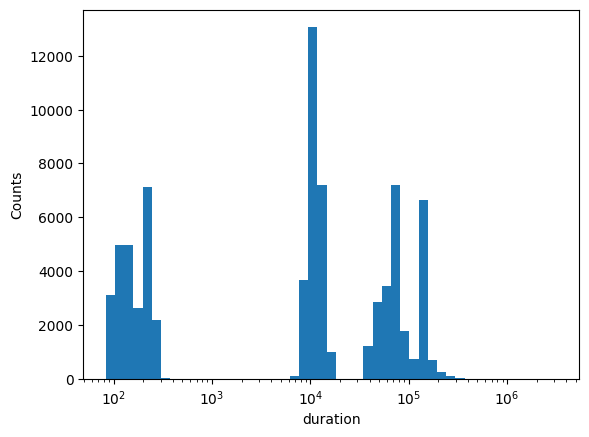

In [33]:
histo(dtn_procs,'duration', bins = 50)

In [34]:
histo(dtn_procs,'num_procs', bins = 50)

No non-zero data found in  num_procs


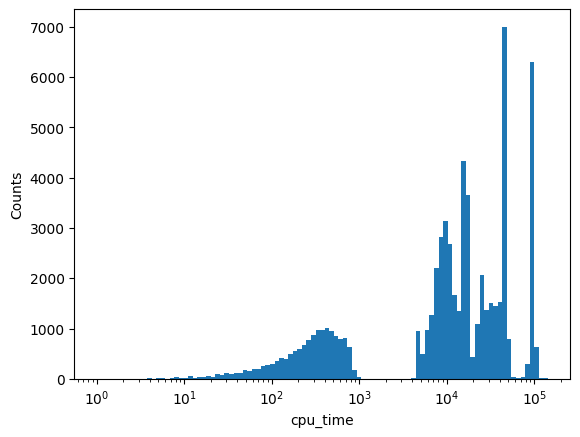

In [39]:
histo(dtn_procs,'cpu_time', bins = 100)

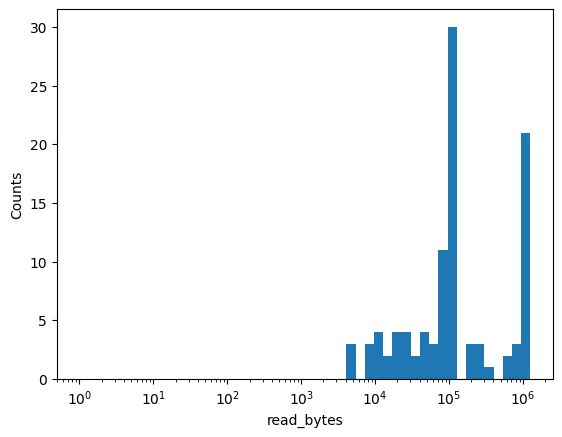

In [36]:
histo(dtn_procs,'read_bytes', bins = 50)

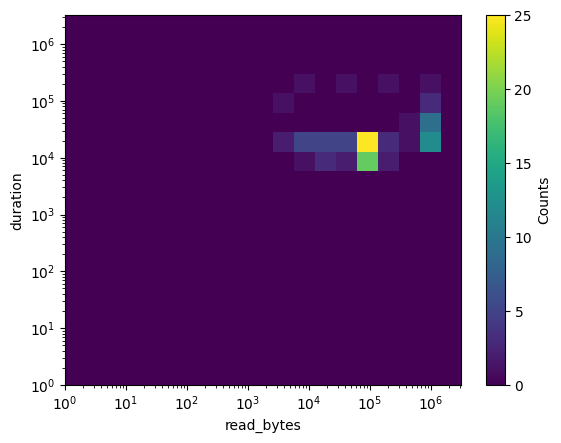

In [48]:
hist2d(dtn_procs,'read_bytes','duration')

In [ ]:
dtn_procs[0]